In [1]:
import math                          
import numpy as np                   
import pandas as pd                  
import scipy                         
import statsmodels.api as sm        
import matplotlib.pyplot as pyplot            
import seaborn as sns               
sns.set() 
import sys
sys.setrecursionlimit(1500)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('total (1).csv',encoding='latin1')
df

,content,time,title
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par..."
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...
...,...,...,...
4974,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m...","24 Feb 2017,Friday",Rasna seeking ?250 cr revenue from snack categ...
4975,Former cricketer Sachin Tendulkar was spotted ...,"03 Aug 2017,Thursday",Sachin attends Rajya Sabha after questions on ...
4976,"Aamir Khan, whose last film Dangal told the st...","03 Aug 2017,Thursday",Shouldn't rob their childhood: Aamir on kids r...
4977,Maharahstra Power Minister Chandrashekhar Bawa...,"07 Dec 2016,Wednesday","Asha Bhosle gets ?53,000 power bill for unused..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  4852 non-null   object
 1   time     4977 non-null   object
 2   title    4977 non-null   object
dtypes: object(3)
memory usage: 116.8+ KB


In [4]:
content=df['title'][1]
content

'Global labour income estimated to have declined by 3.5 trillion USD in first 3 quarters of 2020: ILO'

In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [6]:
import re
content=re.sub('[^a-zA-Z]',' ',str(df['title'][1]))
content=content.lower()
content
# Convert the text into lowercase and remove the ^,"",' and 

'global labour income estimated to have declined by     trillion usd in first   quarters of       ilo'

In [7]:
# To map POS tag to first character
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


In [8]:
word_list = nltk.word_tokenize(content)
print(word_list)
#Tokenize the sentence


['global', 'labour', 'income', 'estimated', 'to', 'have', 'declined', 'by', 'trillion', 'usd', 'in', 'first', 'quarters', 'of', 'ilo']


In [9]:
word_list=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list]
print(word_list)

['global', 'labour', 'income', 'estimate', 'to', 'have', 'decline', 'by', 'trillion', 'usd', 'in', 'first', 'quarter', 'of', 'ilo']


In [10]:
word_list = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print(word_list)

global labour income estimate to have decline by trillion usd in first quarter of ilo


In [11]:
#Removing stopwords
def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [12]:
content

'global labour income estimated to have declined by     trillion usd in first   quarters of       ilo'

In [13]:
remove_stopwords(content, is_lower_case=False)

'global labour income estimated declined trillion usd first quarters ilo'

In [14]:
import re
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
corpus=[]
for i in range(0,4000):
    content=re.sub('[^a-zA-Z]',
                   ' ',
                   str(df['title'][i]))
    content=content.lower()
    word_list = nltk.word_tokenize(content)
    word_list=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list]
    word_list = ' '.join( word_list)
    word_list=remove_stopwords(word_list, is_lower_case=False)
    corpus.append(word_list)
corpus

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['anil ambani discloses worldwide asset tell uk court lead discipline lavish lifestyle',
 'global labour income estimate decline trillion usd first quarter ilo',
 'harley davidson exit india seek local partner serve exist customer',
 'rupee depreciates paisa u dollar early trade',
 'jio start offering mobile service international flight',
 'bytedance applies tech export licence china amid tiktok deal talk',
 'reliance jio begin flight mobile service',
 'harley davidson put brake india biz',
 'flipkart wholesale enters new city ahead festive season',
 'sensex crash point amid global sell nifty slip',
 'black monday dalal street',
 'sensex snap day lose streak rally point reclaim mark',
 'sensex nifty spiral low th day stock buck trend',
 'parliament pass bill provide relief taxpayer compliance front amid covid',
 'post paid tariff war jio unveils jiopostpaid plus entertainment int l roam benefit',
 'swiggy delivery executive strike hyderabad company say disruption service',
 'trai recom

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = TfidfVectorizer(min_df=0.,max_df=1.,use_idf=True)
x= vectorizer.fit_transform(corpus).toarray()
features=vectorizer.fit_transform(corpus)
x


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
len(x[0])

6425

In [17]:
x.shape

(4000, 6425)

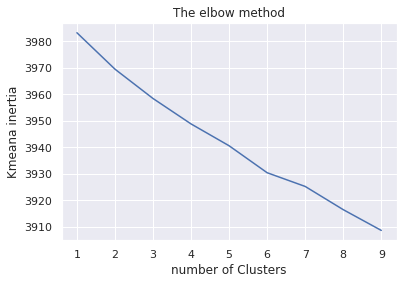

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
pyplot.plot(range(1,10),wcss) 
pyplot.title("The elbow method")
pyplot.xlabel("number of Clusters")
pyplot.ylabel("Kmeana inertia")
pyplot.show()

In [19]:
from matplotlib import pyplot
from pandas import DataFrame
import seaborn as sns 
import pandas as pd
from sklearn.metrics import silhouette_score

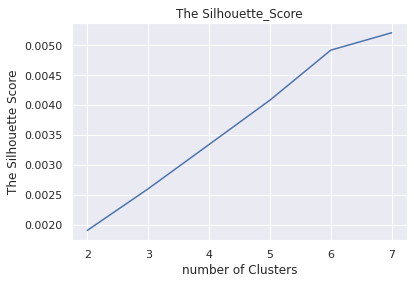

In [20]:
#Evaluation with unlabelled dataset
#The best value is 1 and the worst value is -1. 
#Values near 0 indicate overlapping clusters. 
#Negative values generally indicate that a sample has been assigned to the wrong cluster, 
#as a different cluster is more similar.
from sklearn.cluster import KMeans
Silhouette_score=[]
for i in range(2,8):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    sil_score=silhouette_score(features, labels=kmeans.fit_predict(features)) 
    Silhouette_score.append(sil_score)
Silhouette_score
number_of_Clusters=[2,3,4,5,6,7]
pyplot.plot(range(2,8),Silhouette_score) 
pyplot.title("The Silhouette_Score")
pyplot.xlabel("number of Clusters")
pyplot.ylabel("The Silhouette Score")
pyplot.show()

In [21]:
vocab = vectorizer.get_feature_names()
pd.DataFrame(np.round(x, 2), columns=vocab)


,aadar,aadhaar,aai,aaj,aamar,aamir,aap,aapne,aarey,aaron,aarushi,aayega,aayog,ab,abandon,abduct,abduction,abdul,abdullah,abet,abetment,abhay,abhishek,able,abled,abohar,abortion,abram,abroad,abscond,absence,absolute,abu,abuse,abusive,ac,academic,academy,acb,accept,...,yesterday,yesteryear,yet,yield,yoga,yogi,yorker,yoshihide,young,youngster,younis,youth,youtube,youtuber,yr,yuva,yuvraj,yuzvendra,zac,zaheer,zain,zakhm,zakir,zaltan,zayed,zayn,zealand,zeballos,zeliang,zero,zimbabwe,zinda,zing,zinta,zlatan,zomato,zombie,zone,zoo,zulpikar
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(x)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

#Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space.
#It is thus a judgment of orientation and not magnitude: two vectors with the same orientation have a cosine similarity of 1,
#two vectors oriented at 90° relative to each other have a similarity of 0, 
#and two vectors diametrically opposed have a similarity of -1, independent of their magnitude

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3960,3961,3962,3963,3964,3965,3966,3967,3968,3969,3970,3971,3972,3973,3974,3975,3976,3977,3978,3979,3980,3981,3982,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.149628,0.063193,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.095784,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.086792,0.0,0.000000,0.000000,0.0,0.104708,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.125449,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.330464,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.102556,0.0,0.320665,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035124,0.0,0.080429,0.0,0.0,0.0,0.0,0.0,0.036839,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.034831
3,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.157885
4,0.0,0.0,0.000000,0.000000,1.0,0.0,0.579212,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.09095,0.117279,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.140627,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.129733,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.084179,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.194799,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.178093
3996,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.061885,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134247,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.140801,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000
3997,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0

In [58]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6, random_state=0)
km.fit_transform(similarity_matrix)
cluster_labels1 = km.labels_


In [59]:
cluster_labels = pd.DataFrame(cluster_labels1, columns=['ClusterLabel'])
cluster_labels

,ClusterLabel
0,0
1,0
2,2
3,0
4,0
...,...
3995,0
3996,0
3997,0
3998,0


In [60]:
Final_Report=pd.concat([similarity_df,cluster_labels],axis=1)
Final_Report


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3961,3962,3963,3964,3965,3966,3967,3968,3969,3970,3971,3972,3973,3974,3975,3976,3977,3978,3979,3980,3981,3982,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999,ClusterLabel
0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.149628,0.063193,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0
1,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.095784,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.086792,0.0,0.000000,0.000000,0.0,0.104708,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.125449,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0
2,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.330464,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.102556,0.0,0.320665,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.035124,0.0,0.080429,0.0,0.0,0.0,0.0,0.0,0.036839,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.034831,2
3,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.157885,0
4,0.0,0.0,0.000000,0.000000,1.0,0.0,0.579212,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.09095,0.117279,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.140627,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.129733,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.084179,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.194799,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.178093,0
3996,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.061885,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.134247,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.140801,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0
3997,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,

In [61]:
similarity_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03483121],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03483121, ..., 0.        , 0.        ,
        1.        ]])

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(similarity_matrix)
reduced_cluster_centers = pca.transform(km.cluster_centers_)



In [63]:
reduced_features=pd.DataFrame(reduced_features)
reduced_features=reduced_features.rename(columns={0:'Feature1',1:'Feature2'})
reduced_features

,Feature1,Feature2
0,-0.129666,-0.054536
1,-0.138903,-0.058493
2,-0.213176,0.364880
3,-0.141112,-0.145899
4,-0.105584,-0.081237
...,...,...
3995,-0.119600,0.081026
3996,-0.114701,-0.084758
3997,-0.100687,-0.138473
3998,-0.061930,-0.102396


In [64]:
Final_Report=pd.concat([reduced_features,cluster_labels],axis=1)
Final_Report

,Feature1,Feature2,ClusterLabel
0,-0.129666,-0.054536,0
1,-0.138903,-0.058493,0
2,-0.213176,0.364880,2
3,-0.141112,-0.145899,0
4,-0.105584,-0.081237,0
...,...,...,...
3995,-0.119600,0.081026,0
3996,-0.114701,-0.084758,0
3997,-0.100687,-0.138473,0
3998,-0.061930,-0.102396,0


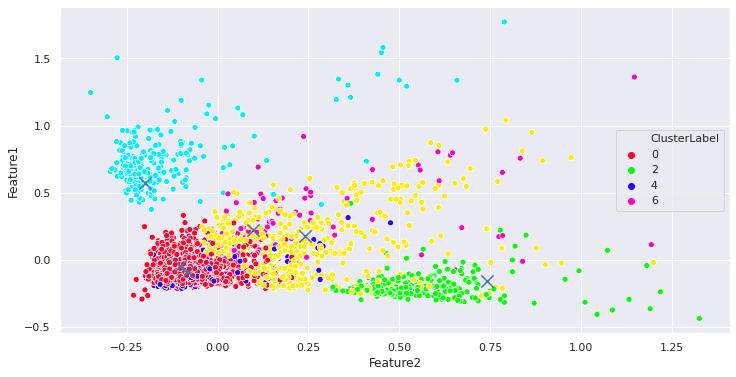

In [65]:
pyplot.figure(figsize=(12,6))
sns.scatterplot(y='Feature1',x='Feature2',data=Final_Report,hue='ClusterLabel',palette='gist_rainbow')
pyplot.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
pyplot.legend()
pyplot.show()

In [66]:
print("Done")

Done


In [67]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [78]:
get_top_keywords(features,cluster_labels1,vectorizer.get_feature_names(),30)
#0---world
#1---Crime
#2---Sports
#3---Delhi_news
#4---Bollywood
#5-- Mumbai_news



Cluster 0
bihar,kill,school,police,minister,give,arrest,post,attack,kohli,china,world,cm,sc,lakh,open,take,cr,win,new,trump,case,make,ban,day,crore,say,bjp,get,govt

Cluster 1
national,american,men,team,pak,set,win,claim,get,first,world,assault,time,note,police,st,fire,jail,uk,origin,arrest,kill,yr,old,pm,modi,year,man,woman,indian

Cluster 2
want,post,flight,stand,pm,st,make,war,day,woman,head,come,president,sc,attack,report,big,win,coach,world,govt,modi,team,th,pak,first,china,pakistan,air,india

Cluster 3
rape,south,fake,report,hc,air,may,girl,aap,dy,man,new,arrest,shot,get,worth,run,yr,held,beat,woman,old,csk,station,capital,govt,police,airport,metro,delhi

Cluster 4
govt,mahabharata,indian,priyanka,year,cast,saif,role,baahubali,make,big,ishaan,rajinikanth,launch,sara,star,katrina,together,show,look,srk,actor,debut,akshay,shahid,upcoming,denies,salman,film,report

Cluster 5
month,train,railway,yr,steal,seize,case,gold,result,die,blast,building,post,held,police,sena,india,year,wort

In [69]:
Final_Report=pd.concat([df,cluster_labels],axis=1)
Final_Report=Final_Report.dropna()
Final_Report

,content,time,title,ClusterLabel
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,0.0
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...,0.0
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par...",2.0
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...,0.0
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,0.0
...,...,...,...,...
3995,The legal battle between the Supreme Court and...,"01 May 2017,Monday",Karnan wants medical test on SC judges who wan...,0.0
3996,The United States of America Cricket Associati...,"01 May 2017,Monday",USA cricket governing body faces expulsion fro...,0.0
3997,"After Uttar Pradesh's anti-romeo squads, anoth...","01 May 2017,Monday",Rajasthan introduces female patrol units to cu...,0.0
3998,In yet another incident of brazen lawlessness ...,"01 May 2017,Monday",Jawan's family abducted by liquor mafia in Har...,0.0


In [70]:
Final_Report['ClusterLabel'].value_counts()

0.0    2566
1.0     575
3.0     254
2.0     221
4.0     174
5.0     115
Name: ClusterLabel, dtype: int64

In [87]:
Final_Report['ClusterLabel']=Final_Report['ClusterLabel'].replace({0:'World',1:'Crime',2:'Sports',3:'Delhi_news',4:'Bollywood',5:'Mumbai_news'})


In [88]:
Final_Report

,content,time,title,ClusterLabel
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,World
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...,World
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par...",Sports
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...,World
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,World
...,...,...,...,...
3995,The legal battle between the Supreme Court and...,"01 May 2017,Monday",Karnan wants medical test on SC judges who wan...,World
3996,The United States of America Cricket Associati...,"01 May 2017,Monday",USA cricket governing body faces expulsion fro...,World
3997,"After Uttar Pradesh's anti-romeo squads, anoth...","01 May 2017,Monday",Rajasthan introduces female patrol units to cu...,World
3998,In yet another incident of brazen lawlessness ...,"01 May 2017,Monday",Jawan's family abducted by liquor mafia in Har...,World


In [89]:
Final_Report['ClusterLabel'].value_counts()

World            2566
Crime             575
State_news        254
Sports            221
Entertainment     174
Mumbai_news       115
Name: ClusterLabel, dtype: int64

In [90]:
Final_Report[Final_Report['ClusterLabel']=='Entertainment']
# Select any news from Bollywood Category


,content,time,title,ClusterLabel
182,The Narcotics Control Bureau (NCB) cloned the ...,"Sep 25, 2020\r\n ,1...",NCB 'cloned' mobile phones of Rhea Chakraborty...,Entertainment
383,"Islamabad, September 25,Pakistanâs Supreme C...","Sep 25, 2020\r\n ,0...",Make judicial commission report on Peshawar sc...,Entertainment
495,US President Donald Trump has called the White...,"03 Aug 2017,Thursday",US Prez Donald Trump called White House a real...,Entertainment
509,"Life OK, which is geared up to re-brand itself...","02 Aug 2017,Wednesday","Ramdev, Sonakshi to judge bhajan reality show:...",Entertainment
511,"Bollywood star Amitabh Bachchan, who is curren...","02 Aug 2017,Wednesday",Sleeping on film sets is a gifted moment in sc...,Entertainment
...,...,...,...,...
3891,After the Supreme Court on Friday upheld the d...,"07 May 2017,Sunday",Nirbhaya wanted her rapists to be set on fire:...,Entertainment
3951,Pescara midfielder Sulley Muntari has been ban...,"03 May 2017,Wednesday",Player who reported racial abuse banned by Ita...,Entertainment
3965,Pakistan Army chief General Qamar Javed Bajwa ...,"03 May 2017,Wednesday",Pak Army chief Bajwa authorised ambush on LoC:...,Entertainment
3985,In a strong message to Pakistan army which kil...,"02 May 2017,Tuesday","Army kills 7 Pakistani soldiers, destroys 2 bu...",Entertainment


In [91]:
Final_Report[(Final_Report['ClusterLabel']=='World') & (Final_Report['time']=='03 Aug 2017,Thursday')]

# Select news from movie category on a partcular date and time....

,content,time,title,ClusterLabel
463,The Daman and Diu administration on Wednesday ...,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,World
465,The Indira Gandhi Institute of Medical Science...,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,World
467,Hotels in Mumbai and other Indian cities are t...,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,World
471,Two years after a helicopter crash near the Bo...,"03 Aug 2017,Thursday",Chopper flying critically low led to 2015 Bomb...,World
472,"It sounds like satire, but make no mistake: at...","03 Aug 2017,Thursday",Congress opens 'State Bank of Tomato' in Lucknow,World
473,The Food Safety and Standards Authority of Ind...,"03 Aug 2017,Thursday",Food regulator planning leftover banks to feed...,World
474,"Bharti Sharma, mother of the 16-year-old boy w...","03 Aug 2017,Thursday",Call devastated his life: Mom of boy who got '...,World
475,Only 26 malls and commercial centres on Mehrau...,"03 Aug 2017,Thursday",19 Gurugram buildings to pay property tax over...,World
476,Scientists have modified human embryos to remo...,"03 Aug 2017,Thursday",Human embryos edited to stop deadly disease fo...,World
478,The Supreme Court on Thursday refused to stay ...,"03 Aug 2017,Thursday",Gujarat Rajya Sabha polls to be held with NOTA...,World


In [92]:
Final_Report.sample(n=10)
#Select any 10 news randomly from the corpus

,content,time,title,ClusterLabel
2947,"Malana village in Himachal Pradesh, famous for...","13 Jul 2017,Thursday",Malana's deity 'orders' closure of joints and ...,World
2562,In the first indication of the government's fu...,"12 Dec 2016,Monday","?2,000 notes to be phased out within 5 years: ...",Crime
1106,Outgoing president Pranab Mukherjee today in h...,"24 Jul 2017,Monday",Indira Gandhi a towering personality: Pranab d...,World
1090,The Kerala high court on Monday rejected the b...,"24 Jul 2017,Monday",HC rejects Dileep's bail plea in actress abduc...,World
2218,Congress' chief ministerial candidate in Uttar...,"04 Jan 2017,Wednesday","Would withdraw as CM face if Cong, SP form all...",World
1465,The new chief executive of India?s embattled N...,"18 Jul 2017,Tuesday",Resolving regulatory probe of NSE top priority...,World
1978,Former England captain Nasser Hussain has come...,"18 Jan 2017,Wednesday",Nasser Hussain suggests three-point plan to di...,World
76,BARCELONA: Atletico Madrid have signed striker...,"Sep 25, 2020\r\n ,0...",Suarez joins Atletico from Barcelona,World
2896,"During her recent interview with HTBrunch, Poo...","14 Jul 2017,Friday","Jism earned more than Zakhm, Tamanna, Dushman,...",World
1945,RSS leader Manmohan Vaidya has stirred a fresh...,"21 Jan 2017,Saturday",Caste-based reservation should end: RSS,World
